# Trabajo Práctico 3

## Pablo Toledo Margalef

## Ejercicio 1

Programe los siguientes filtros espaciales.

1. Filtro pasa-bajos promedio.
2. Filtro pasa-altos.
3. Filtro de agudeza.
4. Filtro mediana.
5. Filtros de detección de bordes de primeras diferencias (Prewitt, Robert y Sobel) y de segundas diferencias (Laplaciano). Para el caso de los filtros de primeras diferencia, deberá considerarse alguna de las estrategias vistas en la teoría para combinar (componer) los resultados parciales de los bordes en cada dirección.

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [60]:
camera = imageio.imread('imageio:camera.png')

In [105]:
def convolute_image(im, kernel, operation):
    h,w = im.shape
    
    kernel_h, kernel_w = kernel.shape
    
    even_kernel = kernel_h%2 == 0
    kernel_h_off, kernel_w_off = kernel_h//2,  kernel_w//2
    
    resize_im = np.pad(im, (kernel_h_off,kernel_w_off), mode='edge')
    
    im_out = np.zeros((h,w))
    
    for i in range(h):
        for j in range(w):
            if even_kernel:
                i_off = i+kernel_h_off+1
                j_off = j+kernel_w_off+1
            else:
                i_off = i+2*kernel_h_off+1
                j_off = j+2*kernel_w_off+1
            portion = resize_im[
                i: i_off,
                j: j_off
            ]
            im_out[i,j] = operation(portion, kernel)
            
    return im_out

In [106]:
def kernel_sum(portion, kernel):
    return np.sum(kernel*portion)
    
def low_pass(im, order=1):
    kernel = 1/9 * np.ones((2*order+1, 2*order+1))
    
    return convolute_image(im,kernel,kernel_sum)



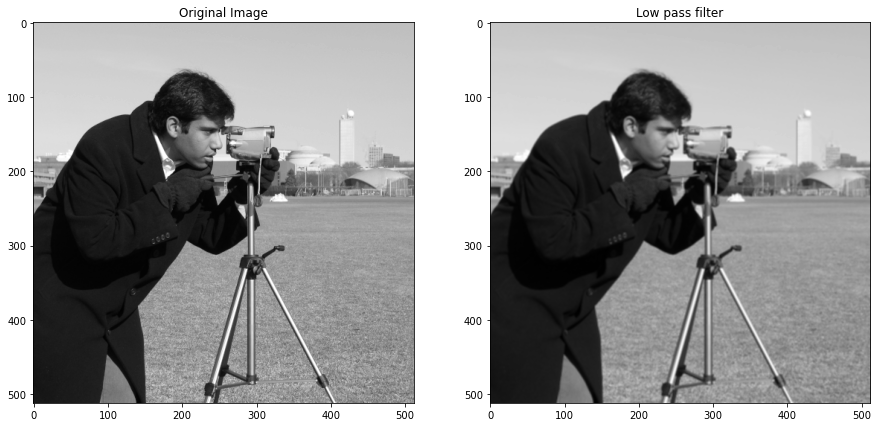

In [107]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("Original Image")
ax[0].imshow(camera, cmap='gray')
ax[1].set_title("Low pass filter")
ax[1].imshow(low_pass(camera, order=1), cmap='gray')
plt.show()

In [108]:
def high_pass(im, alpha=1, order=1):
    kernel = 1/9 * np.array([
        [-1,-1,-1],
        [-1, 8,-1],
        [-1,-1,-1]
    ])

    return np.clip(im + alpha*convolute_image(im, kernel, kernel_sum), 0, 255)

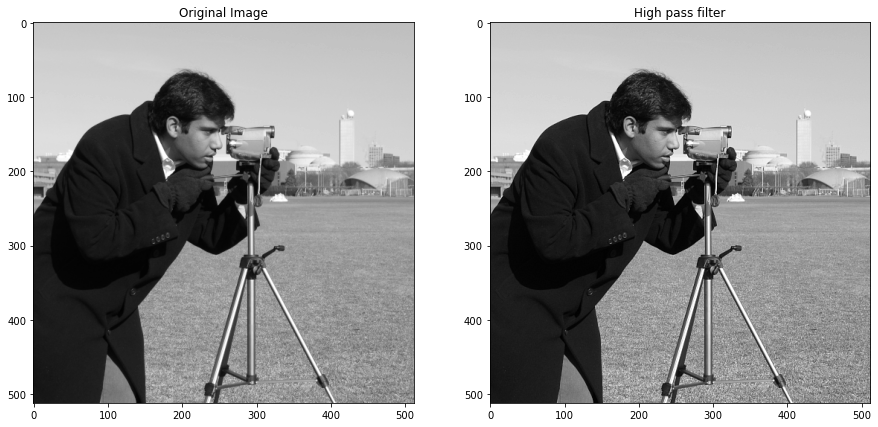

In [109]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("Original Image")
ax[0].imshow(camera, cmap='gray')
ax[1].set_title("High pass filter")
ax[1].imshow(high_pass(camera,alpha=.6, order=1), cmap='gray')
plt.show()

In [110]:
def median_filter(im, order=1):
    kernel = np.ones((2*order+1, 2*order+1))
    def median (portion, kernel):
        return np.median(portion.flat)
    return convolute_image(im, kernel, median)

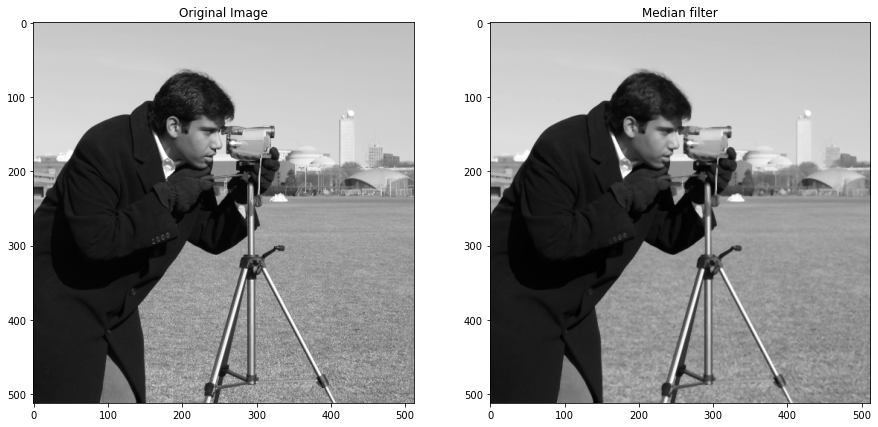

In [111]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("Original Image")
ax[0].imshow(camera, cmap='gray')
ax[1].set_title("Median filter")
ax[1].imshow(median_filter(camera, order=1), cmap='gray')
plt.show()

In [135]:
def roberts(im, g):
    kernel = np.array([
        [1, 0],
        [0,-1]
    ])
    if g=='y':
        kernel = np.rot90(kernel)
    elif g!='x':
        raise ValueError('The parameter g hast to be "x" or "y"')
    
    return np.clip(convolute_image(im, kernel, kernel_sum),0,255)

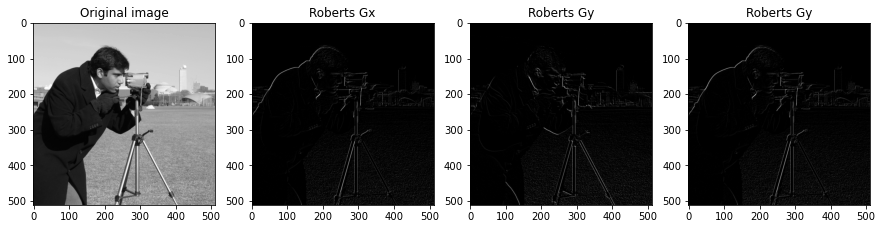

In [155]:
roberts_gx = roberts(camera, g='x')
roberts_gy = roberts(camera, g='y')
gradient_roberts = np.sqrt(roberts_gx**2, roberts_gy**2).clip(0,255)
fig,ax = plt.subplots(1,4, figsize=(15,10))
ax[0].set_title("Original image")
ax[0].imshow(camera, cmap='gray')
ax[1].set_title("Roberts Gx")
ax[1].imshow(roberts_gx, cmap='gray')
ax[2].set_title("Roberts Gy")
ax[2].imshow(roberts_gy, cmap='gray')
ax[3].set_title("Roberts Gy")
ax[3].imshow(gradient_roberts, cmap='gray')

In [138]:
def prewitt(im, g):
    kernel = np.array([
        [-1,-1,-1],
        [ 0, 0, 0],
        [ 1, 1, 1]
    ])
    
    if g=='y':
        kernel = np.transpose(kernel)
    elif g!='x':
        raise ValueError('The parameter g hast to be "x" or "y"')
    
    return np.clip(convolute_image(im, kernel, kernel_sum),0,255)

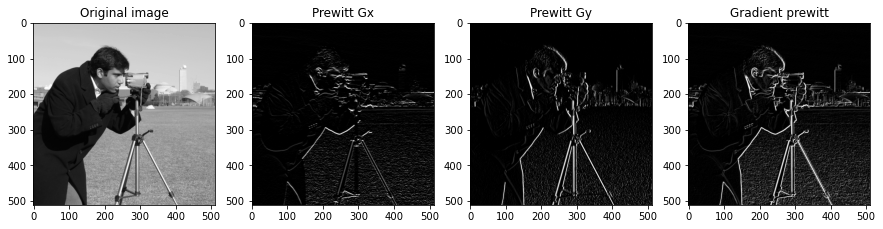

In [158]:
prewitt_gx = prewitt(camera, g='x')
prewitt_gy = prewitt(camera, g='y')
prewitt_gradient = np.sqrt(prewitt_gx**2 + prewitt_gy**2).clip(0,255)
fig,ax = plt.subplots(1,4, figsize=(15,10))
ax[0].set_title("Original image")
ax[0].imshow(camera, cmap='gray')
ax[1].set_title("Prewitt Gx")
ax[1].imshow(prewitt_gx, cmap='gray')
ax[2].set_title("Prewitt Gy")
ax[2].imshow(prewitt_gy, cmap='gray')
ax[3].set_title("Gradient prewitt")
ax[3].imshow(prewitt_gradient, cmap='gray')

In [159]:
def sobel(im, g):
    kernel = np.array([
        [-1,-2,-1],
        [ 0, 0, 0],
        [ 1, 2, 1]
    ])
    
    if g=='y':
        kernel = np.transpose(kernel)
    elif g!='x':
        raise ValueError('The parameter g hast to be "x" or "y"')
    
    return np.clip(convolute_image(im, kernel, kernel_sum),0,255)

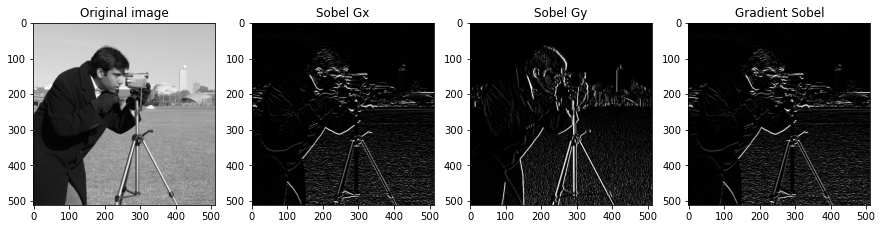

In [162]:
sobel_gx = sobel(camera, g='x')
sobel_gy = sobel(camera, g='y')
sobel_gradient = np.sqrt(sobel_gx**2, sobel_gy**2).clip(0,255)
fig,ax = plt.subplots(1,4, figsize=(15,10))
ax[0].set_title("Original image")
ax[0].imshow(camera, cmap='gray')
ax[1].set_title("Sobel Gx")
ax[1].imshow(sobel_gx, cmap='gray')
ax[2].set_title("Sobel Gy")
ax[2].imshow(sobel_gy, cmap='gray')
ax[3].set_title("Gradient Sobel")
ax[3].imshow(sobel_gradient, cmap='gray')

In [167]:
def laplace(im):
    kernel = np.array([
        [0,1,0],
        [1,-4,1],
        [0,1,0]
    ])
    return convolute_image(im, kernel, kernel_sum).clip(0,255)

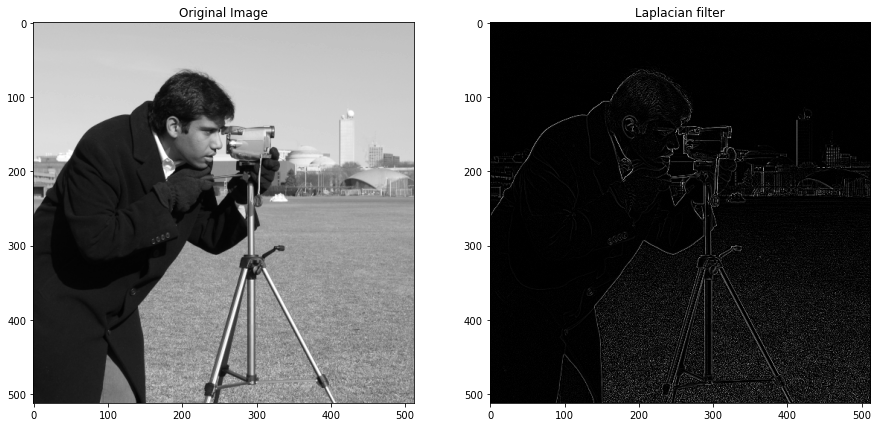

In [168]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
ax[0].set_title("Original Image")
ax[0].imshow(camera, cmap='gray')
ax[1].set_title("Laplacian filter")
ax[1].imshow(laplace(camera), cmap='gray')
plt.show()